# My Financial Analysis

7/3/2020  

This is my first attempt at ever doing any "financial analysis". This is a simple tool I am creating to understand historical trends of stock prices for companies I am interested in.
This is not meant to be a complete financial analysis, and is definitely NOT a tool I endorse to make recommendations on stocks. I am taking two of my recent found interests (Data science and investing), throwing them together, and see what happens! Voila!

*Disclaimer: I have not taken any Finance or Computer Science courses past the introductory classes at UT: FIN320F and CS350e


# Getting Data

You must first install pandas-datareader to use this code! Link to install [here](https://github.com/pydata/pandas-datareader). Pandas-Datareader allows you to pull stock information directly from the internet using different API's. Read more about it [here](https://pandas.pydata.org/pandas-docs/version/0.22.0/remote_data.html). 

You can install using (**pip install pandas-datareader**)

# Import Statements

In [1]:
# Import all the packages you need

from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import datetime

# Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

# Data Preparation

Note: This [documentation](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) tells you how to use pandas-datareader 

In [68]:
# I don't know why but the DataReader is not choosing the correct timeframe no matter what start/end datetimes I initialize here
start_datetime = datetime.datetime(2020,1,1)
end_datetime = datetime.datetime(2020,9,5)

In [35]:
# List the ticker symbols you are interested in (as strings) 
tickers = ["AAL", "SPY", "VOO", "VXX", "CCL", "JETS"]

In [36]:
# I want to store each df separately to do Bollinger band plots later on
each_df = {}
for ticker in tickers:
    each_df[ticker] = data.DataReader(ticker, 'stooq', start_datetime, end_datetime)

In [37]:
# Concatenating dataframes for each ticker together to create a single dataframe called stocks
list_dfs = []
for ticker in tickers:
    list_dfs.append(data.DataReader(ticker, 'stooq', start_datetime, end_datetime))

stocks = pd.concat(list_dfs, axis=1, keys = tickers)

In [38]:
# Setting names for the multi-index 
stocks.columns.names = ['Ticker Symbol','Stock Info']

In [39]:
# What does the df look like
stocks.head()

Ticker Symbol     AAL                                       SPY          \
Stock Info       Open    High     Low   Close    Volume    Open    High   
Date                                                                      
2015-07-07     37.988  38.760  37.351  38.692  10906279  188.18  189.30   
2015-07-08     38.338  38.348  37.235  37.399  11765148  187.99  187.99   
2015-07-09     37.901  38.321  37.722  37.741   8924818  188.26  188.54   
2015-07-10     38.540  39.616  38.533  39.206  17292549  188.48  189.12   
2015-07-13     39.948  40.644  39.919  40.358  12694228  190.05  190.86   

Ticker Symbol                             ...     CCL                          \
Stock Info        Low   Close     Volume  ...    Open    High     Low   Close   
Date                                      ...                                   
2015-07-07     185.61  189.15  191153938  ...  42.555  43.365  41.898  43.306   
2015-07-08     185.71  185.96  180376447  ...  42.786  42.883  42.201  42.209   
2015-07-09     186.19  186.30  158484267  ...  43.086  43.150  42.427  42.442   
2015-07-10     186.35  188.67  142366630  ...  43.570  43.790  43.263  43.634   
2015-07-13     190.00  190.74  116646881  ...  44.505  44.953  44.477  44.712   

Ticker Symbol             JETS                                 
Stock Info      Volume    Open    High     Low   Close Volume  
Date                                                           
2015-07-07     4623325  21.404  21.597  21.020  21.567  28026  
2015-07-08     4633641  21.375  21.375  21.010  21.116  22400  
2015-07-09     3156446  21.529  21.538  21.317  21.394  18442  
2015-07-10     5180563  21.683  22.210  21.673  22.172  51156  
2015-07-13     5109387  22.632  22.632  22.364  22.450  60637  

[5 rows x 30 columns]

In [33]:
# stocks.sort_index(ascending=False, inplace=True)
# stocks.head()

Ticker Symbol    AAL                                       SPY          \
Stock Info      Open    High     Low  Close     Volume    Open    High   
Date                                                                     
2020-07-02     13.35  13.420  12.420  12.50   86439533  314.24  315.70   
2020-07-01     13.48  14.290  12.631  12.81  116661657  309.57  311.89   
2020-06-30     13.10  13.480  12.880  13.07   69607727  303.99  310.20   
2020-06-29     12.57  13.510  12.020  13.32  115051081  301.41  304.61   
2020-06-26     13.20  13.285  12.130  12.38  108813029  306.16  306.39   

Ticker Symbol                             ...    CCL                        \
Stock Info        Low   Close     Volume  ...   Open    High    Low  Close   
Date                                      ...                                
2020-07-02     311.51  312.23   69344217  ...  17.05  17.170  15.80  15.88   
2020-07-01     309.07  310.52   72396542  ...  16.94  17.825  16.19  16.36   
2020-06-30     303.82  308.36  113394772  ...  16.55  16.710  15.85  16.42   
2020-06-29     298.93  304.46   79773260  ...  15.52  16.800  14.92  16.78   
2020-06-26     299.42  300.05  127961017  ...  16.21  16.350  15.16  15.78   

Ticker Symbol             JETS                                    
Stock Info       Volume   Open     High      Low  Close   Volume  
Date                                                              
2020-07-02     30023338  17.00  17.0950  16.5500  16.59  3068486  
2020-07-01     37215109  16.98  17.3500  16.4300  16.52  3782455  
2020-06-30     25267618  16.69  16.8249  16.3564  16.65  2472513  
2020-06-29     36047616  16.17  16.8935  15.8902  16.83  4829417  
2020-06-26     36855964  16.51  16.5400  15.7700  16.02  4264956  

[5 rows x 30 columns]

In [8]:
# start date 
stocks.index[-1]

Timestamp('2020-07-02 00:00:00')

In [9]:
# end date
stocks.index[0]

Timestamp('2015-07-07 00:00:00')

# Returns Analysis

In [10]:
# Looking at the closing prices for each stock
stocks.xs(key='Close',axis=1, level=1).head()

Ticker Symbol,AAL,SPY,VOO,VXX,CCL,JETS
Date,,,,,,
2015-07-07,38.692,189.15,172.47,NaN,43.306,21.567
2015-07-08,37.399,185.96,169.52,NaN,42.209,21.116
2015-07-09,37.741,186.30,169.84,NaN,42.442,21.394
2015-07-10,39.206,188.67,172.01,NaN,43.634,22.172
2015-07-13,40.358,190.74,173.93,NaN,44.712,22.450


Creating a new df called returns that calculates the return after each day. Returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

In [12]:
# We can use pandas pct_change() method on the Close column to create a column representing this return value. 

In [13]:
for ticker in tickers:
    returns[ticker]=stocks.xs(key=(ticker,'Close'), axis=1).pct_change()

In [14]:
returns.head()

,AAL,SPY,VOO,VXX,CCL,JETS
Date,,,,,,
2015-07-07,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-08,-0.033418,-0.016865,-0.017104,NaN,-0.025331,-0.020912
2015-07-09,0.009145,0.001828,0.001888,NaN,0.005520,0.013165
2015-07-10,0.038817,0.012721,0.012777,NaN,0.028085,0.036365
2015-07-13,0.029383,0.010972,0.011162,NaN,0.024706,0.012538


# Best and Worst Single Day Returns

In [15]:
# Date of worst single day returns.
returns.idxmin()

AAL    2020-03-18
SPY    2020-03-16
VOO    2020-03-16
VXX    2020-03-23
CCL    2020-04-01
JETS   2020-03-18
dtype: datetime64[ns]

In [16]:
# Date of worst single day returns.
returns.idxmax()

AAL    2020-06-04
SPY    2020-03-24
VOO    2020-03-24
VXX    2020-03-16
CCL    2020-04-06
JETS   2020-03-24
dtype: datetime64[ns]

# Std of returns to understand riskiness of each stock

In [17]:
# By look at the standard deviation of all the returns, we can see which stocks are more volatile
returns.std()

AAL     0.033823
SPY     0.011990
VOO     0.012221
VXX     0.054169
CCL     0.032168
JETS    0.021300
dtype: float64

In [18]:
# Looking at the standard deviation over YTD 2020 just to see effect of coronavirus
returns.loc['2020-07-03':'2020-01-01'].std()

AAL    NaN
SPY    NaN
VOO    NaN
VXX    NaN
CCL    NaN
JETS   NaN
dtype: float64

In [19]:
# as compared to the same time period in 2019
returns.loc['2019-07-03':'2019-01-01'].std()

AAL    NaN
SPY    NaN
VOO    NaN
VXX    NaN
CCL    NaN
JETS   NaN
dtype: float64

C:\Users\80203607\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning:

invalid value encountered in true_divide



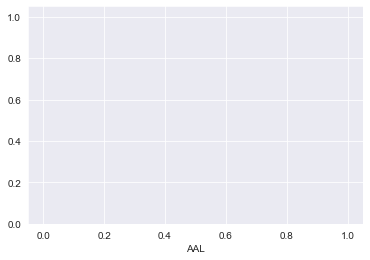

In [20]:
# We can show the distributions of the daily returns using Seaborn's distplot
a = returns["AAL"].loc['2019-12-30':'2019-01-01'].dropna()
a
plot = sns.distplot(a, bins=100, color='red')
# plot.set_xlim([-0.05, 0.05])

# Visualizations over time

In [21]:
# Using plotly to plot all the stocks over time. This graph shows daily closing prices 
stocks.xs(key='Close',axis=1,level=1).iplot()

C:\Users\80203607\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



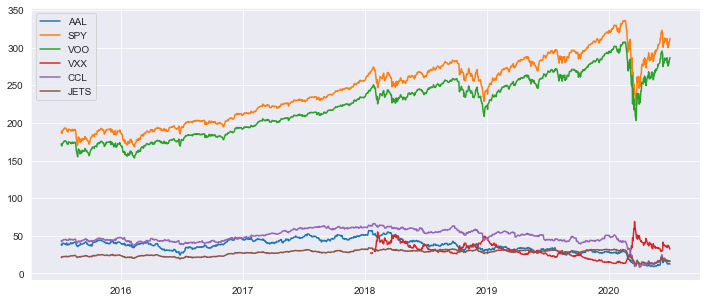

In [22]:
# Using matplotlib (in case Plotly stops working above) to plot all the stocks over time. This graph shows daily closing prices 
fig = plt.figure(figsize=(12,5))
for ticker in tickers:
    plt.plot(stocks[ticker]["Close"])
    plt.legend(tickers)

# Moving Averages

Moving averages are an important analytical tool used to identify current price trends and the potential for a change in an established trend. The simplest use of a SMA in analysis is using it to quickly identify if a security is in an uptrend or downtrend. 

Source: [Investopedia](https://www.investopedia.com/terms/s/sma.asp)

In [58]:
# I added my own bollinger bands since cufflinks looked wrong
# source: https://ad1m.github.io/derivative/bollinger_bands.html

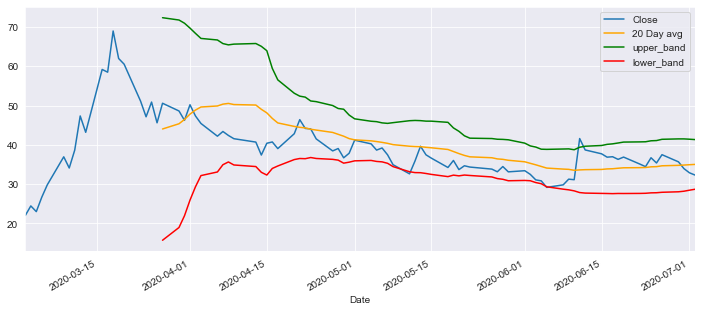

In [77]:
# Using moving averages, I can filter out some of the noise and focus on trends in the stocks
# need to gloabalize variables such as start/end date, rolling avg window, ticker symbol, etc;
tick = "VXX"
start_datetime = datetime.datetime(2020,3,1)
end_datetime = datetime.datetime(2020,11,1)


plt.figure(figsize=(12,5))
stocks[tick]["Close"].loc[start_datetime:end_datetime].plot(label="Close")
rolling_mean = stocks[tick]["Close"].loc[start_datetime:end_datetime].rolling(window=20).mean()
rolling_mean.plot(label="20 Day avg", color='orange')

rolling_std = stocks[tick]["Close"].loc[start_datetime:end_datetime].rolling(window=20).std()
upper_band = rolling_mean + 2*rolling_std
lower_band = rolling_mean - 2*rolling_std
upper_band.plot(label="upper_band", color='green')
lower_band.plot(label="lower_band", color='red')
    
plt.legend()

# Technical Analysis Plots

Using the Cufflinks library to create some Technical Analysis plots.

Use .iplot(kind='candle) to create a [candlestick chart](https://en.wikipedia.org/wiki/Candlestick_chart). Candlestick charts are a commonly used financial chart to show price movements in stocks

In [43]:
each_df['AAL'][['Open', 'High', 'Low', 'Close']].loc['2020-07-04':'2020-01-01'].iplot(kind='candle',title="Candlestick")

Use .ta_plot(study='sma') to create a Simple Moving Averages plot

Another popular, albeit slightly more complex, analytical use is to compare a pair of simple moving averages with each covering different time frames. If a shorter-term simple moving average is above a longer-term average, an uptrend is expected. On the other hand, if the long-term average is above a shorter-term average then a downtrend might be the expected outcome.

Two popular trading patterns that use simple moving averages include the death cross and a golden cross. A death cross occurs when the 50-day SMA crosses below the 200-day SMA. This is considered a bearish signal, that further losses are in store. The golden cross occurs when a short-term SMA breaks above a long-term SMA. Reinforced by high trading volumes, this can signal further gains are in store.

Source: [Investopedia](https://www.investopedia.com/terms/s/sma.asp)

In [44]:
each_df['AAL']['Close'].loc['2020-07-04':'2020-01-01'].ta_plot(study='sma',periods=[13,55],title='Simple Moving Averages')

Use .ta_plot(study='boll') to create a [Bollinger Band Plot](https://www.investopedia.com/terms/b/bollingerbands.asp). This link is a pretty good understanding of the principles behind Bollinger Band Plots. I am primarily using this plot to understand undersold vs. oversold stocks. Here's another good [link](https://www.investopedia.com/articles/technical/102201.asp)

In [27]:
each_df['VXX']['Close'].loc['2020-07-04':'2020-01-01'].ta_plot(study='boll', title='Bolling Band Plot')